Image segmentation is one of the key processes in machine vision applications to partition a digital image into a group of pixels. There are many great ways to segment an image.

### Image Segmentation

Take a look at the image below of candies placed in a particular order to form a word. And, if a robot with vision was a task to count the number of candies by colour, it would be important for him to understand the boundaries between the candies.

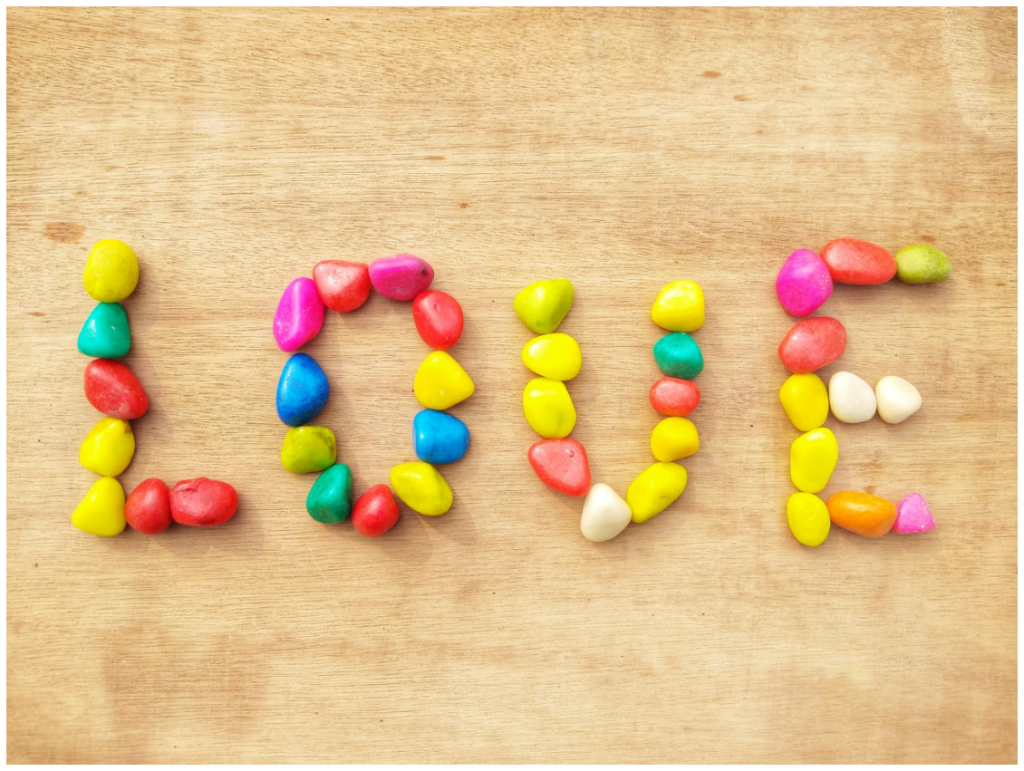

We will use the image above for the task of Image Segmentation. Now, let’s load the necessary packages and load the image from Unsplash to get started with this task:

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
import numpy as np

(-0.5, 4607.5, 3455.5, -0.5)

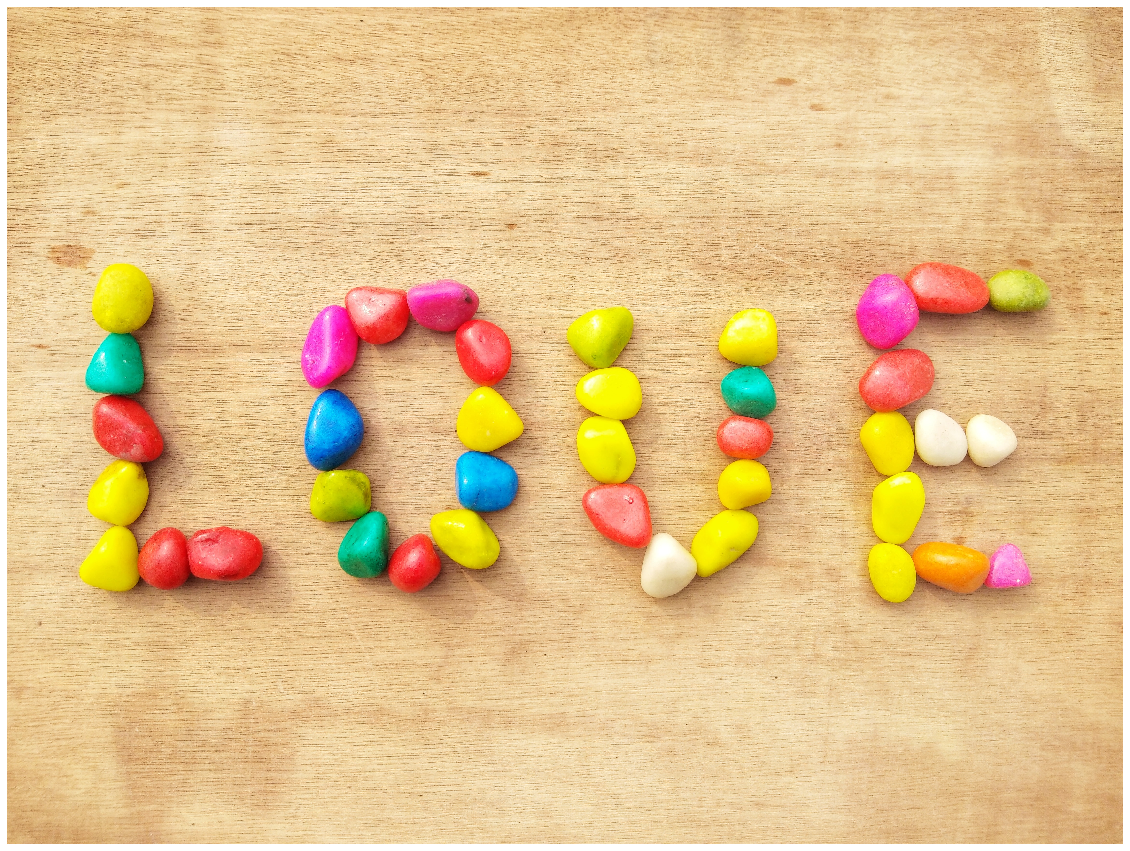

In [2]:
cimage = imread('https://images.unsplash.com/photo-1580015915218-685fd3cbfa97?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=1267&amp;q=80')
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cimage)
ax.axis('off')

To segment this image we need to find the boundary of all the candies and then we will see what colour they are consisting off, for this we will plot a scatter plot to visualize all the colours of the candies with proper segmentation to understand all the colours inside the image. It will be a long code but it will be easy to run and learn:

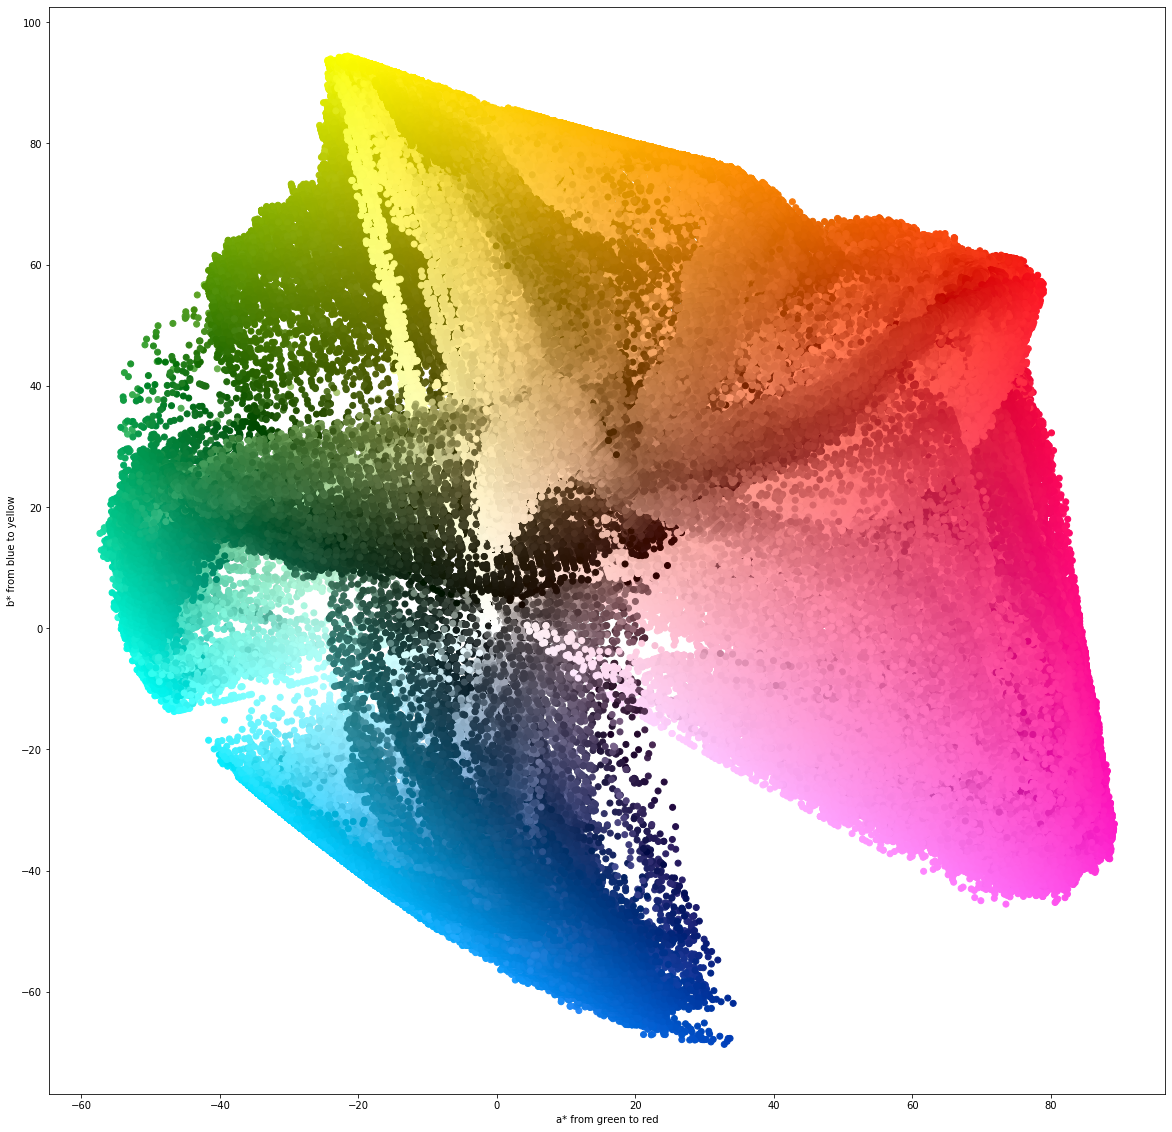

In [3]:
# convert the image from RGB to LAB
lab_img = color.rgb2lab(cimage)
x,y,z = lab_img.shape

# to plot the colors we will use the RGB values from the
# image directly for colors. 
to_plot = cimage.reshape(x*y, 3)
colors_map = to_plot.astype(np.float)/256

# create dataset for scatter plot
scatter_x = []
scatter_y = []
for xi in range(x):
    for yi in range(y):
        L_val = lab_img[xi,yi][0] 
        A_val = lab_img[xi,yi][1] 
        B_val = lab_img[xi,yi][2]
        scatter_x.append(A_val)
        scatter_y.append(B_val)
        
plt.figure(figsize=(20,20))
plt.xlabel("a* from green to red")
plt.ylabel("b* from blue to yellow")
plt.scatter(scatter_x,scatter_y, c=colors_map)

As we are done with the scatter plot to segment the image according to the colours of the candies, we can use this idea to segment the candies inside the image properly according to their colours:

In [4]:
def filter_color(L_val_min, A_val_min, A_val_max, B_val_min, B_val_max):
    filtered_image = np.copy(cimage)
    for xi in range(x):
        for yi in range(y):
            L_val = lab_img[xi,yi][0] 
            A_val = lab_img[xi,yi][1] 
            B_val = lab_img[xi,yi][2]
            if L_val > L_val_min and A_val > A_val_min and A_val < A_val_max  and B_val > B_val_min and B_val < B_val_max:
                pass
            else:
                filtered_image[xi, yi] = [255,255,255]   
    return filtered_image

(-0.5, 4607.5, 3455.5, -0.5)

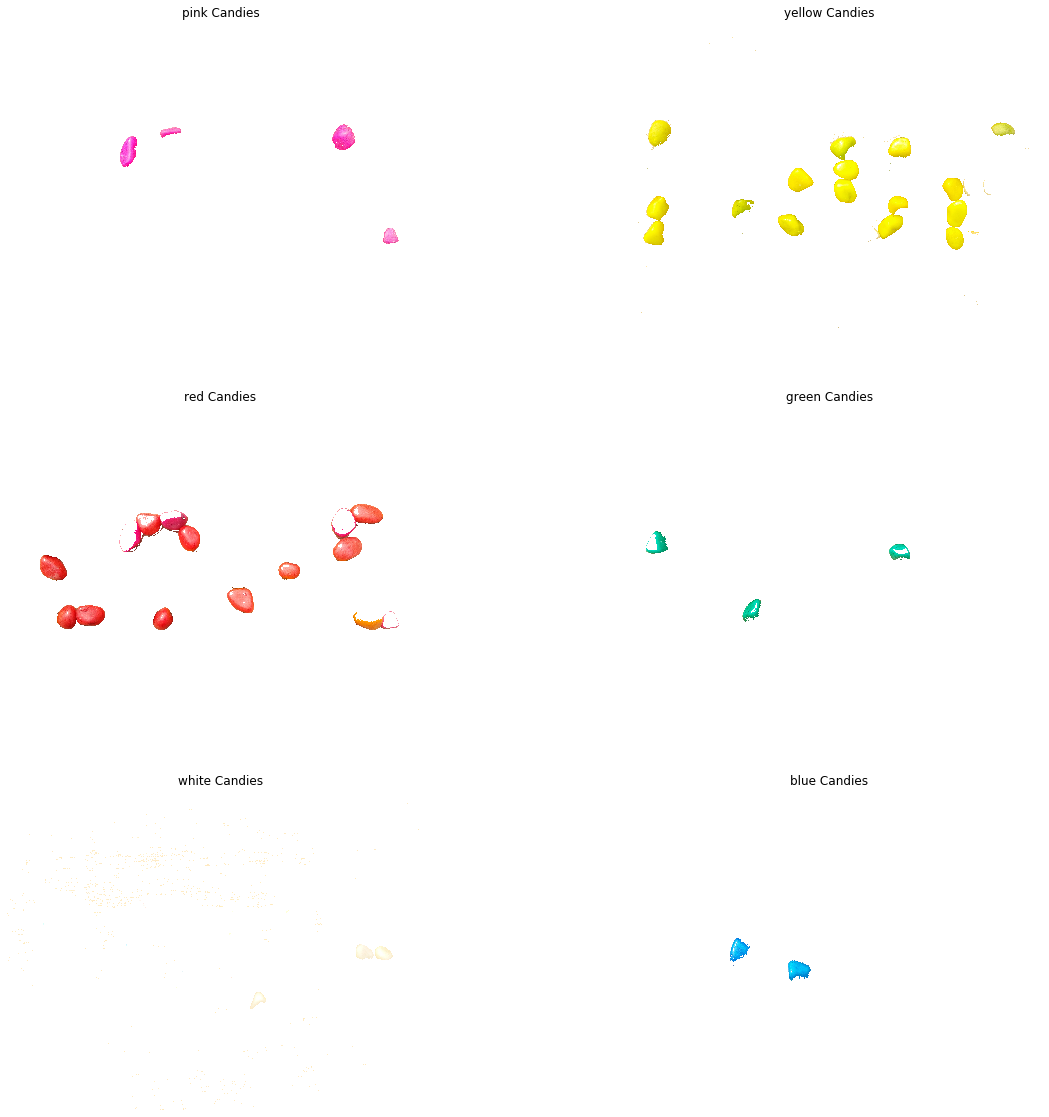

In [5]:
lab_img = color.rgb2lab(cimage)
yellow = filter_color(70, -50, 0, 30, 100)
red = filter_color(30, 25, 100, 0, 100)
green = filter_color(50, -128, -20, 0, 50)
blue = filter_color(50,-40, 30, -128, -20)
white = filter_color(93, -25, 25, -25, 25)
pink = filter_color(50, 20,128,-50,0)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
ax[0][0].imshow(pink)
ax[0][0].set_title("pink Candies")
ax[0][0].axis('off')

ax[0][1].imshow(yellow)
ax[0][1].set_title("yellow Candies")
ax[0][1].axis('off')

ax[1][0].imshow(red)
ax[1][0].set_title("red Candies")
ax[1][0].axis('off')

ax[1][1].imshow(green)
ax[1][1].set_title("green Candies")
ax[1][1].axis('off')

ax[2][0].imshow(white)
ax[2][0].set_title("white Candies")
ax[2][0].axis('off')

ax[2][1].imshow(blue)
ax[2][1].set_title("blue Candies")
ax[2][1].axis('off')